In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:

# Read the CSV file using the semicolon as the delimiter
dir_name = "round-3-island-data-bottle"
filename = f"{dir_name}/prices_round_3_day_0.csv"

df = pd.read_csv(filename, delimiter=';')

df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,VOLCANIC_ROCK_VOUCHER_10500,99.0,19.0,NaN,NaN,NaN,NaN,100,19,NaN,NaN,NaN,NaN,99.5,0.0
1,0,0,DJEMBES,13493.0,72.0,NaN,NaN,NaN,NaN,13494,72,NaN,NaN,NaN,NaN,13493.5,0.0
2,0,0,CROISSANTS,4321.0,111.0,NaN,NaN,NaN,NaN,4322,111,NaN,NaN,NaN,NaN,4321.5,0.0
3,0,0,JAMS,6631.0,210.0,NaN,NaN,NaN,NaN,6633,210,NaN,NaN,NaN,NaN,6632.0,0.0
4,0,0,VOLCANIC_ROCK_VOUCHER_10000,505.0,19.0,NaN,NaN,NaN,NaN,506,19,NaN,NaN,NaN,NaN,505.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,0,999900,VOLCANIC_ROCK_VOUCHER_10250,277.0,7.0,NaN,NaN,NaN,NaN,278,18,NaN,NaN,NaN,NaN,277.5,0.0
139996,0,999900,JAMS,6541.0,183.0,NaN,NaN,NaN,NaN,6543,183,NaN,NaN,NaN,NaN,6542.0,0.0
139997,0,999900,VOLCANIC_ROCK_VOUCHER_10000,515.0,7.0,NaN,NaN,NaN,NaN,517,18,NaN,NaN,NaN,NaN,516.0,0.0
139998,0,999900,DJEMBES,13409.0,64.0,NaN,NaN,NaN,NaN,13410,64,NaN,NaN,NaN,NaN,13409.5,0.0


In [3]:
print(set(df['product'].unique()))

{'VOLCANIC_ROCK_VOUCHER_10000', 'PICNIC_BASKET1', 'JAMS', 'VOLCANIC_ROCK_VOUCHER_10500', 'VOLCANIC_ROCK_VOUCHER_9750', 'KELP', 'VOLCANIC_ROCK_VOUCHER_10250', 'CROISSANTS', 'DJEMBES', 'VOLCANIC_ROCK', 'PICNIC_BASKET2', 'VOLCANIC_ROCK_VOUCHER_9500', 'SQUID_INK', 'RAINFOREST_RESIN'}


In [4]:

product_name = "KELP"
# Filter only for product == "KELP"
kelp_df = df[df['product'] == product_name].dropna(subset=['bid_price_1', 'ask_price_1'])

# Get bid and ask prices
bid_prices = kelp_df['bid_price_1']
ask_prices = kelp_df['ask_price_1']

In [5]:
kelp_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
5,0,0,KELP,2028.0,30.0,NaN,NaN,NaN,NaN,2032,30,NaN,NaN,NaN,NaN,2030.0,0.0
17,0,100,KELP,2030.0,4.0,2028.0,31.0,NaN,NaN,2032,31,NaN,NaN,NaN,NaN,2031.0,0.0
41,0,200,KELP,2029.0,1.0,2028.0,21.0,NaN,NaN,2032,22,NaN,NaN,NaN,NaN,2030.5,0.0
46,0,300,KELP,2029.0,25.0,NaN,NaN,NaN,NaN,2032,25,NaN,NaN,NaN,NaN,2030.5,0.0
66,0,400,KELP,2029.0,2.0,2028.0,23.0,NaN,NaN,2030,6,2032.0,25.0,NaN,NaN,2029.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139937,0,999500,KELP,2032.0,28.0,NaN,NaN,NaN,NaN,2035,28,NaN,NaN,NaN,NaN,2033.5,0.0
139956,0,999600,KELP,2032.0,36.0,NaN,NaN,NaN,NaN,2035,29,NaN,NaN,NaN,NaN,2033.5,0.0
139968,0,999700,KELP,2034.0,1.0,2032.0,26.0,NaN,NaN,2035,26,NaN,NaN,NaN,NaN,2034.5,0.0
139976,0,999800,KELP,2032.0,27.0,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



"""
Process order book data for a single product with all requested features.

Returns:
    dict: Contains all processed data and metrics
"""


bin_width = 0.5
bin_range = 8
n_clusters = 20



# Subset product data
product_df = df[df['product'] == product_name].reset_index(drop=True)

# Order book columns
bid_cols = [('bid_price_1', 'bid_volume_1'), ('bid_price_2', 'bid_volume_2'), ('bid_price_3', 'bid_volume_3')]
ask_cols = [('ask_price_1', 'ask_volume_1'), ('ask_price_2', 'ask_volume_2'), ('ask_price_3', 'ask_volume_3')]
price_volume_cols = bid_cols + ask_cols

# Initialize bins
bins = np.arange(-bin_range * bin_width, (bin_range + 1) * bin_width, bin_width)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Initialize histograms
hist_bid = np.zeros(len(bin_centers))
hist_ask = np.zeros_like(hist_bid)

# Trackers
last_price_center = 0.0
histogram_vectors = []
prev_raw = None
prev_diff = None

# Process each frame
for frame in range(len(product_df)):
    row = product_df.iloc[frame]
    new_bid = np.zeros_like(hist_bid)
    new_ask = np.zeros_like(hist_ask)
    
    # Calculate price center
    all_prices = np.array([row[p] for p, _ in price_volume_cols if not pd.isna(row[p])])
    price_center = np.median(all_prices) if all_prices.size > 0 else last_price_center
    last_price_center = price_center
    
    # Process bids
    for price_col, vol_col in bid_cols:
        price = row[price_col]
        volume = row[vol_col]
        if pd.isna(price) or pd.isna(volume): continue
        price -= price_center
        bin_idx = np.searchsorted(bins, price, side='right') - 1
        if 0 <= bin_idx < len(new_bid):
            new_bid[bin_idx] += volume
    
    # Process asks
    for price_col, vol_col in ask_cols:
        price = row[price_col]
        volume = row[vol_col]
        if pd.isna(price) or pd.isna(volume): continue
        price -= price_center
        bin_idx = np.searchsorted(bins, price, side='right') - 1
        if 0 <= bin_idx < len(new_ask):
            new_ask[bin_idx] += volume
    
    # Normalize and smooth
    new_bid /= (np.linalg.norm(new_bid) + 1e-8)
    new_ask /= (np.linalg.norm(new_ask) + 1e-8)
    hist_bid = alpha * hist_bid + (1-alpha) * new_bid
    hist_ask = alpha * hist_ask + (1-alpha) * new_ask
    
    # Create feature vector
    bid_wprice = np.sum(bin_centers * hist_bid)
    ask_wprice = np.sum(bin_centers * hist_ask)
    spread = bid_wprice - ask_wprice
    
    raw_vector = np.concatenate([
        hist_bid, 
        hist_ask,
        [bid_wprice, ask_wprice, spread]
    ])
    
    # Add nonlinear transforms
    log_features = np.log(np.abs(raw_vector) + 1e-8)
    signed_sqrt = np.sign(raw_vector) * np.sqrt(np.abs(raw_vector))
    
    # Calculate derivatives
    if frame == 0:
        prev_raw = raw_vector
        prev_diff = np.zeros_like(raw_vector)
    else:
        diff = raw_vector - prev_raw
        accel = diff - prev_diff
        
        frame_vector = np.concatenate([
            raw_vector,
            signed_sqrt,
            diff,
            accel
        ])
        histogram_vectors.append(frame_vector)
        
        prev_diff = diff
        prev_raw = raw_vector

# Convert to numpy array
feature_matrix = np.array(histogram_vectors)

# --- Price Movement Labels ---
mid_prices = product_df['mid_price'].values
price_change = mid_prices[2:] - mid_prices[1:-1]  # t+1 vs t
price_direction = (price_change > 0).astype(int)  # 1=up, 0=down

# Align features with labels (skip first raw-only vector)
aligned_features = feature_matrix[1:][:len(price_direction)]

# --- PCA Visualization ---
pca = PCA(n_components=2)
proj = pca.fit_transform(aligned_features)

# Plot 1: Basic PCA
plt.figure(figsize=(8, 6))
plt.scatter(proj[:, 0], proj[:, 1], c=np.arange(len(proj)), cmap='viridis', s=5)
plt.title(f"PCA Projection: {product_name}")
plt.colorbar(label="Timestep")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
#plt.savefig(f"r2_output/{product_name}_pca.png")
#plt.close()

# Plot 2: Direction-colored PCA
colors = np.where(price_direction == 1, 'green', 'red')
plt.figure(figsize=(8, 6))
plt.scatter(proj[:, 0], proj[:, 1], c=colors, s=6, alpha=0.8)
plt.title(f"PCA Colored by Next Price Movement: {product_name}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
#plt.savefig(f"r2_output/{product_name}_pca_directional.png")
#plt.close()

# --- KMeans Clustering ---
# Augment features with direction label
X_augmented = np.hstack([
    aligned_features,
    price_direction.reshape(-1, 1)
])

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_augmented)

# Plot 3: Cluster visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(proj[:, 0], proj[:, 1], c=cluster_labels, cmap='tab10', s=8, alpha=0.8)
plt.title(f"KMeans Clusters (n={n_clusters}): {product_name}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()
#plt.savefig(f"r2_output/{product_name}_kmeans_clusters.png")
#plt.close()

# --- Vector Quantization ---
codebook = kmeans.cluster_centers_[:, :-1]  # Remove direction column
vq_indices = np.argmin(np.linalg.norm(aligned_features[:, np.newaxis] - codebook, axis=2), axis=1)
vq_reconstructed = codebook[vq_indices]
vq_mse = mean_squared_error(aligned_features, vq_reconstructed)

# Save all outputs
outputs = {
    'product': product_name,
    'features': aligned_features,
    'price_direction': price_direction,
    'cluster_labels': cluster_labels,
    'codebook': codebook,
    'vq_indices': vq_indices,
    'vq_reconstructed': vq_reconstructed,
    'metrics': {
        'feature_dim': aligned_features.shape[1],
        'n_samples': aligned_features.shape[0],
        'vq_mse': vq_mse,
        'n_clusters': n_clusters,
        'price_up_ratio': np.mean(price_direction)
    }
}

print(outputs)

NameError: name 'alpha' is not defined

In [ ]:
num_codewords = int(vq_indices.max()) + 1
eps = 0.01  # Neutral threshold

# Transition count matrix: [Δp1_up, Δp1_neutral, Δp1_down, Δ²p_up, Δ²p_neutral, Δ²p_down, Δp2_up, Δp2_neutral, Δp2_down]
transition_counts = np.zeros((num_codewords, 12), dtype=int)

for t in range(len(vq_indices) - 32):  # must go to len - 2 for Δ²p and Δp2
    code_idx = vq_indices[t]
    
    p_t = kelp_df['mid_price'].iloc[t]
    p_t1 = kelp_df['mid_price'].iloc[t + 1]
    p_t2 = kelp_df['mid_price'].iloc[t + 16]
    p_t4 = kelp_df['mid_price'].iloc[t + 32]
    

    # First-order price change
    delta_p1 = p_t1 - p_t
    if delta_p1 > eps:
        transition_counts[code_idx, 0] += 1  # Δp1 up
    elif delta_p1 < -eps:
        transition_counts[code_idx, 2] += 1  # Δp1 down
    else:
        transition_counts[code_idx, 1] += 1  # Δp1 neutral

    # Second derivative (acceleration)
    delta2_p = p_t2 - 2 * p_t1 + p_t
    if delta2_p > eps:
        transition_counts[code_idx, 3] += 1  # Δ²p up
    elif delta2_p < -eps:
        transition_counts[code_idx, 5] += 1  # Δ²p down
    else:
        transition_counts[code_idx, 4] += 1  # Δ²p neutral

    # Price change over 2 steps
    delta_p2 = p_t2 - p_t
    if delta_p2 > eps:
        transition_counts[code_idx, 6] += 1  # Δp2 up
    elif delta_p2 < -eps:
        transition_counts[code_idx, 8] += 1  # Δp2 down
    else:
        transition_counts[code_idx, 7] += 1  # Δp2 neutral
        
    # Price change over 4 steps
    delta_p2 = p_t4 - p_t
    if delta_p2 > eps:
        transition_counts[code_idx, 9] += 1  # Δp2 up
    elif delta_p2 < -eps:
        transition_counts[code_idx, 11] += 1  # Δp2 down
    else:
        transition_counts[code_idx, 10] += 1  # Δp2 neutral

# Create DataFrame
transition_df = pd.DataFrame(
    transition_counts,
    columns=[
        'Δp1_up', 'Δp1_neutral', 'Δp1_down',
        'Δ²p_up', 'Δ²p_neutral', 'Δ²p_down',
        'Δp2_up', 'Δp2_neutral', 'Δp2_down',
        'Δp4_up', 'Δp4_neutral', 'Δp4_down'
        
    ],
    index=[f'codeword_{i}' for i in range(num_codewords)]
)

print("📊 Extended Codeword Transition Summary:")
print(transition_df)

# Save to CSV
#transition_df.to_csv("codeword_transition_summary_extended.csv")


📊 Extended Codeword Transition Summary:
             Δp1_up  Δp1_neutral  Δp1_down  Δ²p_up  Δ²p_neutral  Δ²p_down  \
codeword_0      464          116       298     356          124       398   
codeword_1      266          155       454     483           82       310   
codeword_2       48           31        83      95           10        57   
codeword_3      167          166       225     266           77       215   
codeword_4       63           35        51      62           19        68   
codeword_5      285          134       151     154           69       347   
codeword_6      171          512       129     253          263       296   
codeword_7       80          161        57      97           75       126   
codeword_8      225          120       263     287           72       249   
codeword_9      143           60       118     130           58       133   
codeword_10     119           77       202     222           39       137   
codeword_11     119           85    

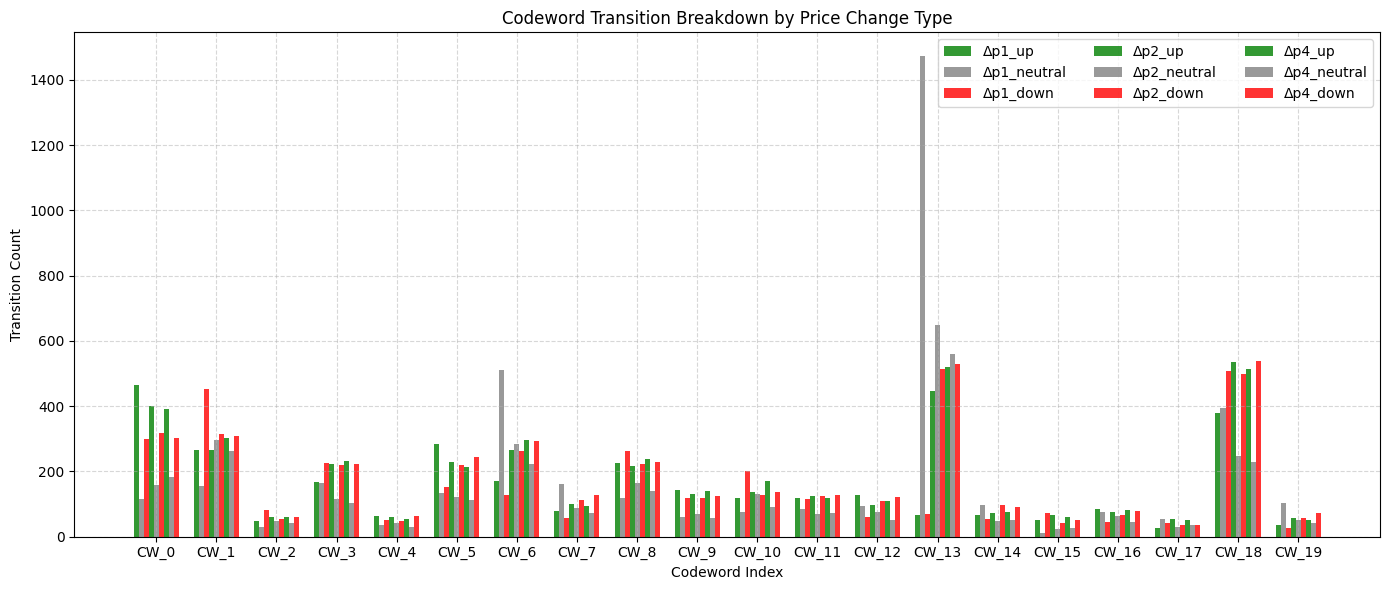

In [ ]:
import matplotlib.pyplot as plt

# Set up category groupings
groups = {
    'Δp1': ['Δp1_up', 'Δp1_neutral', 'Δp1_down'],
    'Δp2': ['Δp2_up', 'Δp2_neutral', 'Δp2_down'],
    'Δp4': ['Δp4_up', 'Δp4_neutral', 'Δp4_down']
}
#     'Δ²p': ['Δ²p_up', 'Δ²p_neutral', 'Δ²p_down'],

# Bar plot setup
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(num_codewords)  # one group per codeword
bar_width = 0.25
colors = ['green', 'gray', 'red']

# Plot each group (Δp1, Δ²p, Δp2) offset on x-axis
for i, (group_label, cols) in enumerate(groups.items()):
    offset = (i - 1) * bar_width  # center groups around each x
    for j, col in enumerate(cols):
        ax.bar(x + offset + (j - 1) * (bar_width / 3), transition_df[col], 
               width=bar_width / 3, label=f'{group_label}_{["up", "neutral", "down"][j]}',
               color=colors[j], alpha=0.8)

# Labeling
ax.set_xlabel("Codeword Index")
ax.set_ylabel("Transition Count")
ax.set_title("Codeword Transition Breakdown by Price Change Type")
ax.set_xticks(x)
ax.set_xticklabels([f"CW_{i}" for i in x])
ax.legend(ncol=3)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# OTHER STUFF BELOW

In [ ]:
# Create output directory if needed
os.makedirs("r2_output", exist_ok=True)


# Save numpy files
np.save(f"r2_output/{product_name}_features.npy", aligned_features)
np.save(f"r2_output/{product_name}_codebook.npy", codebook)
np.save(f"r2_output/{product_name}_vq_indices.npy", vq_indices)



def process_all_products(csv_path):
    """Process all products in the dataset"""
    df = pd.read_csv(csv_path, delimiter=';')
    products = set(df['product'].unique())
    print(f"Products List: {products}")
    
    results = {}
    for product in products:
        print(f"\nProcessing {product}...")
        results[product] = process_product_orderbook(df, product)
        
        # Print summary
        metrics = results[product]['metrics']
        print(f"✅ Completed {product}:")
        print(f"   Samples: {metrics['n_samples']}")
        print(f"   Features: {metrics['feature_dim']}")
        print(f"   VQ MSE: {metrics['vq_mse']:.4f}")
        print(f"   Price Up %: {metrics['price_up_ratio']*100:.1f}%")
        print(f"   Saved plots and data to r2_plots/{product}_*")
    
    return results

# Example usage
if __name__ == "__main__":
    results = process_all_products("round-2-island-data-bottle/prices_round_2_day_-1.csv")


🎥 Animation saved as kelp_price_volume_histogram.mp4
💾 Histogram vectors saved to kelp_histogram_vectors.npy
📊 Mean feature variance: 0.051171


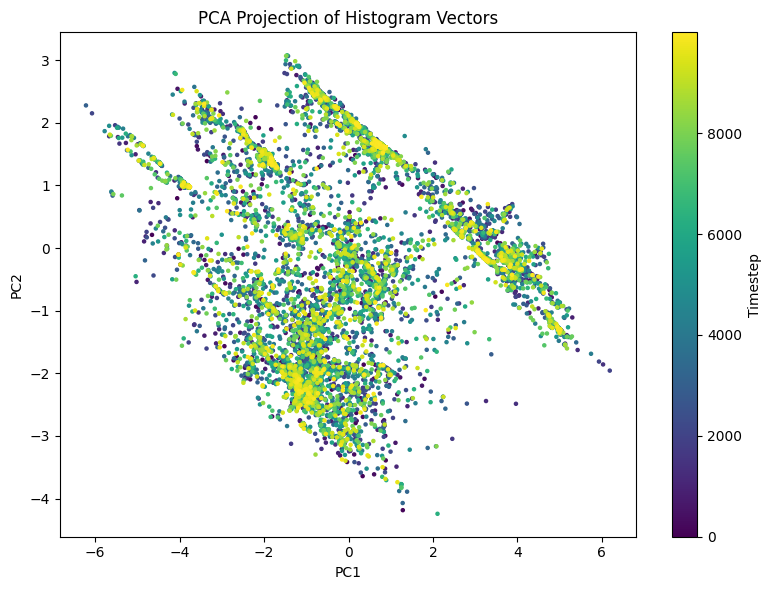

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.decomposition import PCA

# Load and subset KELP data
kelp_df = pd.read_csv("round-3-island-data-bottle/prices_round_3_day_0.csv", delimiter=';')
kelp_df = kelp_df[kelp_df['product'] == 'KELP'].reset_index(drop=True)

#kelp_df = kelp_df.iloc[:1000]

# Bid and ask price-volume pairs
bid_cols = [('bid_price_1', 'bid_volume_1'), ('bid_price_2', 'bid_volume_2'), ('bid_price_3', 'bid_volume_3')]
ask_cols = [('ask_price_1', 'ask_volume_1'), ('ask_price_2', 'ask_volume_2'), ('ask_price_3', 'ask_volume_3')]
price_volume_cols = bid_cols + ask_cols

# Parameters
alpha = 0.2       # lower smoothing to retain more new info
bin_width = 0.2   # finer granularity
bin_range = 8    # extend range to keep coverage
bins = np.arange(-bin_range * bin_width, (bin_range + 1) * bin_width, bin_width)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Initialize histograms
hist_bid = np.zeros(len(bin_centers))
hist_ask = np.zeros_like(hist_bid)

# Prepare plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_bid = ax.bar(bin_centers, hist_bid, width=bin_width, color='green', edgecolor='black', label='Bid')
bar_ask = ax.bar(bin_centers, hist_ask, width=bin_width, color='red', edgecolor='black', alpha=0.6, label='Ask')
ax.set_xlim(-bin_range * bin_width, bin_range * bin_width)
ax.set_ylim(0, 1)  # normalized height
ax.set_xlabel("Relative Price (Centered)")
ax.set_ylabel("Normalized Volume")
title_obj = ax.set_title("")
ax.legend()

# Track histogram vectors for VQ
histogram_vectors = []

# Optional: track last valid center if all prices are NaN
last_price_center = 0.0
first_vector_appended = False

# Animation update function
def update(frame):
    global hist_bid, hist_ask, last_price_center

    row = kelp_df.iloc[frame]
    new_bid = np.zeros_like(hist_bid)
    new_ask = np.zeros_like(hist_ask)

    # Median price center
    all_prices = np.array([row[p] for p, _ in price_volume_cols if not pd.isna(row[p])])
    if all_prices.size == 0:
        price_center = last_price_center
    else:
        price_center = np.median(all_prices)
        last_price_center = price_center

    # Fill bid histogram
    for price_col, vol_col in bid_cols:
        price = row[price_col]
        volume = row[vol_col]
        if pd.isna(price) or pd.isna(volume): continue
        price -= price_center
        bin_idx = np.searchsorted(bins, price, side='right') - 1
        if 0 <= bin_idx < len(new_bid):
            new_bid[bin_idx] += volume

    # Fill ask histogram
    for price_col, vol_col in ask_cols:
        price = row[price_col]
        volume = row[vol_col]
        if pd.isna(price) or pd.isna(volume): continue
        price -= price_center
        bin_idx = np.searchsorted(bins, price, side='right') - 1
        if 0 <= bin_idx < len(new_ask):
            new_ask[bin_idx] += volume

    # Normalize and smooth
    new_bid /= (np.sum(new_bid) + 1e-8)
    new_ask /= (np.sum(new_ask) + 1e-8)
    hist_bid = alpha * hist_bid + new_bid
    hist_ask = alpha * hist_ask + new_ask

    # Plot
    for bar, h in zip(bar_bid, hist_bid): bar.set_height(h)
    for bar, h in zip(bar_ask, hist_ask): bar.set_height(h)

    # Frame vector components
    hb = hist_bid / (np.sum(hist_bid) + 1e-8)
    ha = hist_ask / (np.sum(hist_ask) + 1e-8)
    spread = hb - ha
    spread_mag = np.abs(spread)
    raw_vector = np.concatenate([hb, ha, spread, spread_mag])
    log_features = np.log(np.abs(raw_vector) + 1e-8)  # Avoid log(0)
    signed_sqrt = np.sign(raw_vector) * np.sqrt(np.abs(raw_vector))

    # Only append vector from frame 1 onward
    if frame == 0:
        # Store separately for diff computation
        update.prev_raw = raw_vector
        update.prev_diff = np.zeros_like(raw_vector)
    else:
        diff = raw_vector - update.prev_raw
        accel = diff - update.prev_diff  # Second derivative
        frame_vector = np.concatenate([raw_vector, diff, accel, signed_sqrt])
        histogram_vectors.append(frame_vector)
        update.prev_diff = diff
        update.prev_raw = raw_vector

    title_obj.set_text(f"Time: {row['timestamp']}")
    return list(bar_bid) + list(bar_ask) + [title_obj]

# Needed to attach to function (like a static variable)
update.prev_raw = None


# Run animation
ani = animation.FuncAnimation(fig, update, frames=len(kelp_df), interval=100, blit=False)
ani.save(f"r3_output/{thingy}_price_volume_histogram.mp4", writer='ffmpeg', fps=20)
plt.close()

# Save histogram vectors for VQ
histogram_vectors_np = np.array(histogram_vectors)
np.save(f"r3_output/{thingy}_histogram_vectors.npy", histogram_vectors_np)
print("🎥 Animation saved as kelp_price_volume_histogram.mp4")
print("💾 Histogram vectors saved to kelp_histogram_vectors.npy")

# Variance analysis
variances = np.var(histogram_vectors_np, axis=0)
print(f"📊 Mean feature variance: {np.mean(variances):.6f}")

# PCA plot for visual inspection
pca = PCA(n_components=2)
proj = pca.fit_transform(histogram_vectors_np)

plt.figure(figsize=(8, 6))
plt.scatter(proj[:, 0], proj[:, 1], c=np.arange(len(proj)), cmap='viridis', s=5)
plt.title("PCA Projection of Histogram Vectors")
plt.colorbar(label="Timestep")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("kelp_histogram_vectors_pca.png")
plt.show()


10000


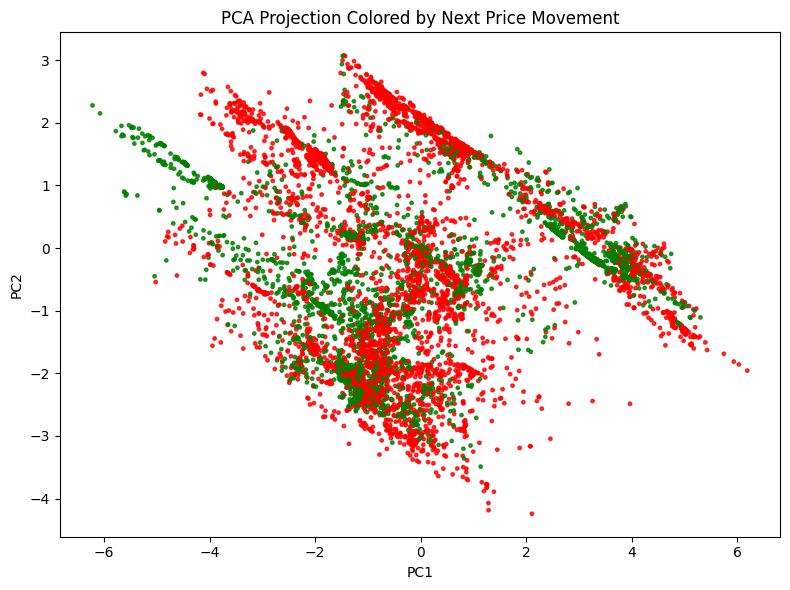

In [ ]:
# --- Price Movement Labels ---
# Compute binary labels: 1 if next mid_price increases, 0 otherwise
mid_prices = kelp_df['mid_price'].values
print(len(kelp_df))
# Note: histogram_vectors starts at frame 1, so align by skipping first
price_change = mid_prices[2:] - mid_prices[1:-1]  # compare t+1 vs t
price_direction = (price_change > 0).astype(int)  # 1 for up, 0 for down

# Align PCA with label length
proj = pca.fit_transform(histogram_vectors_np[1:])  # skip first raw-only vector

# Define colors: green for up, red for down
colors = np.where(price_direction == 1, 'green', 'red')

# --- Plot Colored PCA ---
plt.figure(figsize=(8, 6))
plt.scatter(proj[:, 0], proj[:, 1], c=colors, s=6, alpha=0.8)
plt.title("PCA Projection Colored by Next Price Movement")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("kelp_histogram_vectors_pca_directional.png")
plt.show()

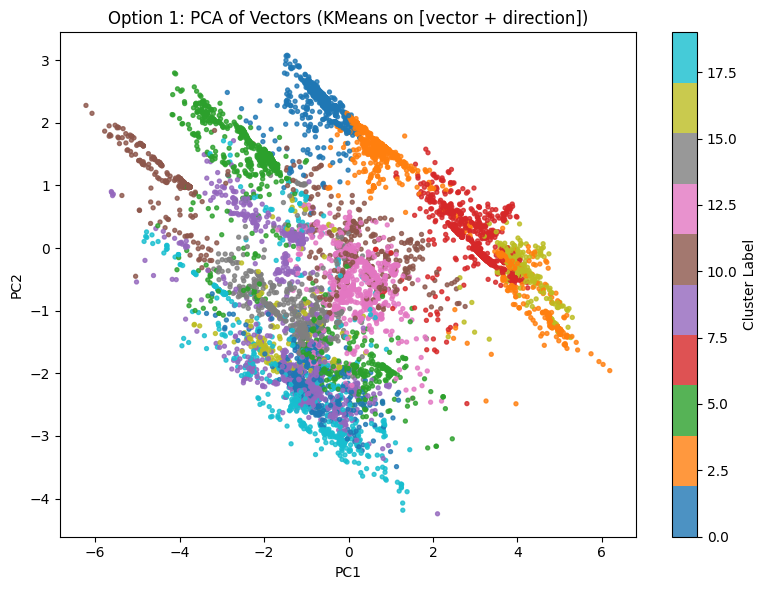

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Augment features with direction label
X_augmented = np.hstack([
    histogram_vectors_np[1:],  # shape (N-1, 320)
    price_direction.reshape(-1, 1)  # shape (N-2, 1)
])[:len(price_direction)]  # Ensure matching lengths

# Run KMeans on augmented data
n_clusters = 20
kmeans_aug = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_aug = kmeans_aug.fit_predict(X_augmented)

# PCA for visualization
pca_aug = PCA(n_components=2)
proj_aug = pca_aug.fit_transform(histogram_vectors_np[1:][:len(price_direction)])

# Color by cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(proj_aug[:, 0], proj_aug[:, 1], c=cluster_labels_aug, cmap='tab10', s=8, alpha=0.8)
plt.title("Option 1: PCA of Vectors (KMeans on [vector + direction])")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster Label")
plt.tight_layout()
plt.savefig("kmeans_augmented_direction.png")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# -------- Save VQ Outputs -------- #

# Strip direction column from the codebook for runtime use (inference-safe)
codebook_aug = kmeans_aug.cluster_centers_[:, :-1]  # shape: (20, 320)
np.save(f"r3_models/{thingy}_vq_codebook_aug.npy", codebook_aug)

# Assign clusters using only raw frame vectors (exclude direction)
frame_vectors = histogram_vectors_np[1:][:len(price_direction)]  # shape: (N-2, 320)
vq_indices = np.argmin(np.linalg.norm(frame_vectors[:, np.newaxis] - codebook_aug, axis=2), axis=1)
np.save(f"r3_models/{thingy}_vq_indices_aug.npy", vq_indices)

# Reconstruct VQ vectors from index and codebook
vq_reconstructed = codebook_aug[vq_indices]
np.save(f"r3_models/{thingy}_vq_reconstructed_aug.npy", vq_reconstructed)

# Compute MSE
vq_mse = mean_squared_error(frame_vectors, vq_reconstructed)
print("✅ Saved VQ files:")
print(f"📦 Codebook shape: {codebook_aug.shape}")
print(f"🔢 Indices shape: {vq_indices.shape}")
print(f"🧠 MSE between original and VQ reconstruction: {vq_mse:.6f}")


✅ Saved VQ files:
📦 Codebook shape: (20, 256)
🔢 Indices shape: (9998,)
🧠 MSE between original and VQ reconstruction: 0.012613


In [ ]:
import numpy as np
import pandas as pd

# Load VQ results and price data
vq_indices = np.load(f"{thingy}_vq_indices_aug.npy")
kelp_df = pd.read_csv("round-3-island-data-bottle/prices_round_3_day_0.csv", delimiter=';')
kelp_df = kelp_df[kelp_df['product'] == thingy].dropna(subset=['mid_price']).reset_index(drop=True)
kelp_df = kelp_df.iloc[:9999]

assert len(vq_indices) == len(kelp_df), "Mismatch in length between VQ indices and price data"

num_codewords = int(vq_indices.max()) + 1
eps = 0.01  # Neutral threshold

# Transition count matrix: [Δp1_up, Δp1_neutral, Δp1_down, Δ²p_up, Δ²p_neutral, Δ²p_down, Δp2_up, Δp2_neutral, Δp2_down]
transition_counts = np.zeros((num_codewords, 12), dtype=int)

for t in range(len(vq_indices) - 32):  # must go to len - 2 for Δ²p and Δp2
    code_idx = vq_indices[t]
    
    p_t = kelp_df['mid_price'].iloc[t]
    p_t1 = kelp_df['mid_price'].iloc[t + 1]
    p_t2 = kelp_df['mid_price'].iloc[t + 16]
    p_t4 = kelp_df['mid_price'].iloc[t + 32]
    

    # First-order price change
    delta_p1 = p_t1 - p_t
    if delta_p1 > eps:
        transition_counts[code_idx, 0] += 1  # Δp1 up
    elif delta_p1 < -eps:
        transition_counts[code_idx, 2] += 1  # Δp1 down
    else:
        transition_counts[code_idx, 1] += 1  # Δp1 neutral

    # Second derivative (acceleration)
    delta2_p = p_t2 - 2 * p_t1 + p_t
    if delta2_p > eps:
        transition_counts[code_idx, 3] += 1  # Δ²p up
    elif delta2_p < -eps:
        transition_counts[code_idx, 5] += 1  # Δ²p down
    else:
        transition_counts[code_idx, 4] += 1  # Δ²p neutral

    # Price change over 2 steps
    delta_p2 = p_t2 - p_t
    if delta_p2 > eps:
        transition_counts[code_idx, 6] += 1  # Δp2 up
    elif delta_p2 < -eps:
        transition_counts[code_idx, 8] += 1  # Δp2 down
    else:
        transition_counts[code_idx, 7] += 1  # Δp2 neutral
        
    # Price change over 4 steps
    delta_p2 = p_t4 - p_t
    if delta_p2 > eps:
        transition_counts[code_idx, 9] += 1  # Δp2 up
    elif delta_p2 < -eps:
        transition_counts[code_idx, 11] += 1  # Δp2 down
    else:
        transition_counts[code_idx, 10] += 1  # Δp2 neutral

# Create DataFrame
transition_df = pd.DataFrame(
    transition_counts,
    columns=[
        'Δp1_up', 'Δp1_neutral', 'Δp1_down',
        'Δ²p_up', 'Δ²p_neutral', 'Δ²p_down',
        'Δp2_up', 'Δp2_neutral', 'Δp2_down',
        'Δp4_up', 'Δp4_neutral', 'Δp4_down'
        
    ],
    index=[f'codeword_{i}' for i in range(num_codewords)]
)

print("📊 Extended Codeword Transition Summary:")
print(transition_df)

# Save to CSV
transition_df.to_csv("codeword_transition_summary_extended.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'KELP_vq_indices_aug.npy'

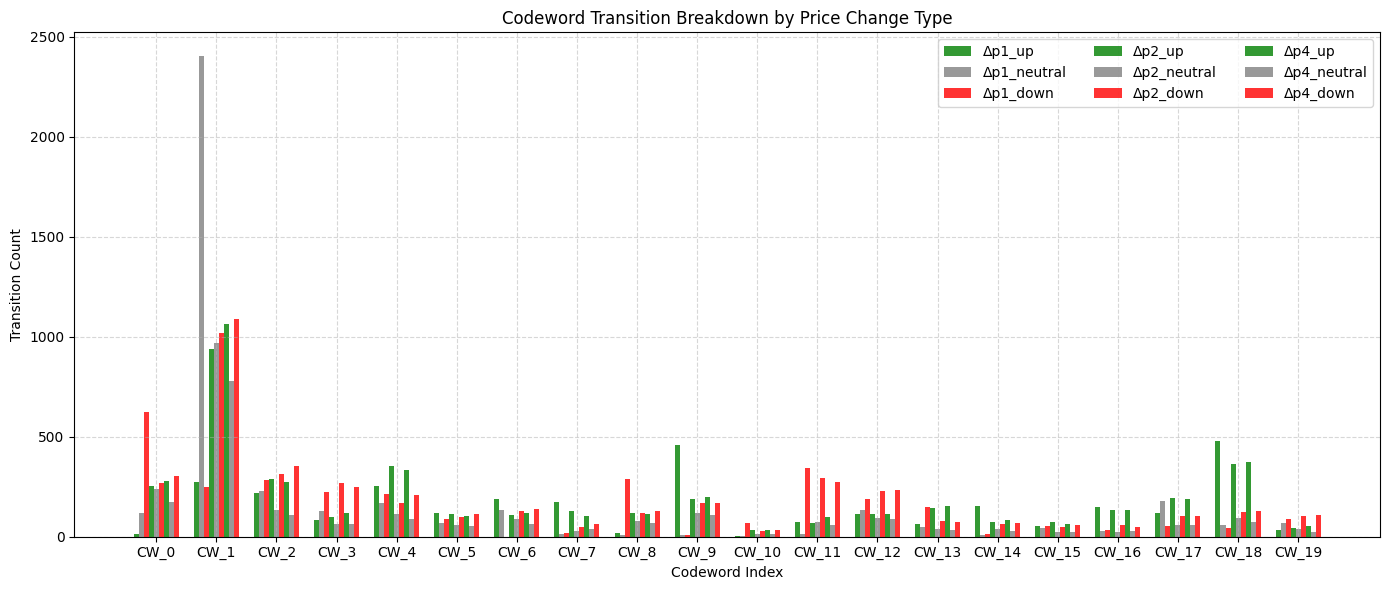

In [ ]:
import matplotlib.pyplot as plt

# Set up category groupings
groups = {
    'Δp1': ['Δp1_up', 'Δp1_neutral', 'Δp1_down'],
    'Δp2': ['Δp2_up', 'Δp2_neutral', 'Δp2_down'],
    'Δp4': ['Δp4_up', 'Δp4_neutral', 'Δp4_down']
}
#     'Δ²p': ['Δ²p_up', 'Δ²p_neutral', 'Δ²p_down'],

# Bar plot setup
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(num_codewords)  # one group per codeword
bar_width = 0.25
colors = ['green', 'gray', 'red']

# Plot each group (Δp1, Δ²p, Δp2) offset on x-axis
for i, (group_label, cols) in enumerate(groups.items()):
    offset = (i - 1) * bar_width  # center groups around each x
    for j, col in enumerate(cols):
        ax.bar(x + offset + (j - 1) * (bar_width / 3), transition_df[col], 
               width=bar_width / 3, label=f'{group_label}_{["up", "neutral", "down"][j]}',
               color=colors[j], alpha=0.8)

# Labeling
ax.set_xlabel("Codeword Index")
ax.set_ylabel("Transition Count")
ax.set_title("Codeword Transition Breakdown by Price Change Type")
ax.set_xticks(x)
ax.set_xticklabels([f"CW_{i}" for i in x])
ax.legend(ncol=3)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# DO LATER

In [ ]:
import matplotlib.pyplot as plt




import numpy as np
import pandas as pd

# Load VQ results and price data
vq_indices = np.load("vq_indices.npy")
kelp_df = pd.read_csv("round-2-island-data-bottle/prices_round_2_day_0.csv", delimiter=';')
kelp_df = kelp_df[kelp_df['product'] == 'KELP'].dropna(subset=['mid_price']).reset_index(drop=True)
kelp_df = kelp_df.iloc[:1000]

assert len(vq_indices) == len(kelp_df), "Mismatch in length between VQ indices and price data"

num_codewords = int(vq_indices.max()) + 1
eps = 0.01  # Neutral threshold

# Transition count matrix: [Δp1_up, Δp1_neutral, Δp1_down, Δ²p_up, Δ²p_neutral, Δ²p_down, Δp2_up, Δp2_neutral, Δp2_down]
transition_counts = np.zeros((num_codewords, 12), dtype=int)

for t in range(len(vq_indices) - 4):  # must go to len - 2 for Δ²p and Δp2
    code_idx = vq_indices[t]
    
    p_t = kelp_df['mid_price'].iloc[t]
    p_t1 = kelp_df['mid_price'].iloc[t + 1]
    p_t2 = kelp_df['mid_price'].iloc[t + 2]
    p_t4 = kelp_df['mid_price'].iloc[t + 4]
    

    # First-order price change
    delta_p1 = p_t1 - p_t
    if delta_p1 > eps:
        transition_counts[code_idx, 0] += 1  # Δp1 up
    elif delta_p1 < -eps:
        transition_counts[code_idx, 2] += 1  # Δp1 down
    else:
        transition_counts[code_idx, 1] += 1  # Δp1 neutral

    # Second derivative (acceleration)
    delta2_p = p_t2 - 2 * p_t1 + p_t
    if delta2_p > eps:
        transition_counts[code_idx, 3] += 1  # Δ²p up
    elif delta2_p < -eps:
        transition_counts[code_idx, 5] += 1  # Δ²p down
    else:
        transition_counts[code_idx, 4] += 1  # Δ²p neutral

    # Price change over 2 steps
    delta_p2 = p_t2 - p_t
    if delta_p2 > eps:
        transition_counts[code_idx, 6] += 1  # Δp2 up
    elif delta_p2 < -eps:
        transition_counts[code_idx, 8] += 1  # Δp2 down
    else:
        transition_counts[code_idx, 7] += 1  # Δp2 neutral
        
    # Price change over 4 steps
    delta_p2 = p_t4 - p_t
    if delta_p2 > eps:
        transition_counts[code_idx, 9] += 1  # Δp2 up
    elif delta_p2 < -eps:
        transition_counts[code_idx, 11] += 1  # Δp2 down
    else:
        transition_counts[code_idx, 10] += 1  # Δp2 neutral

# Create DataFrame
transition_df = pd.DataFrame(
    transition_counts,
    columns=[
        'Δp1_up', 'Δp1_neutral', 'Δp1_down',
        'Δ²p_up', 'Δ²p_neutral', 'Δ²p_down',
        'Δp2_up', 'Δp2_neutral', 'Δp2_down',
        'Δp4_up', 'Δp4_neutral', 'Δp4_down'
        
    ],
    index=[f'codeword_{i}' for i in range(num_codewords)]
)

print("📊 Extended Codeword Transition Summary:")
print(transition_df)



# Set up category groupings
groups = {
    'Δp1': ['Δp1_up', 'Δp1_neutral', 'Δp1_down'],
    'Δp2': ['Δp2_up', 'Δp2_neutral', 'Δp2_down'],
    'Δp4': ['Δp4_up', 'Δp4_neutral', 'Δp4_down']
}
#     'Δ²p': ['Δ²p_up', 'Δ²p_neutral', 'Δ²p_down'],

# Bar plot setup
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(num_codewords)  # one group per codeword
bar_width = 0.25
colors = ['green', 'gray', 'red']

# Plot each group (Δp1, Δ²p, Δp2) offset on x-axis
for i, (group_label, cols) in enumerate(groups.items()):
    offset = (i - 1) * bar_width  # center groups around each x
    for j, col in enumerate(cols):
        ax.bar(x + offset + (j - 1) * (bar_width / 3), transition_df[col], 
               width=bar_width / 3, label=f'{group_label}_{["up", "neutral", "down"][j]}',
               color=colors[j], alpha=0.8)

# Labeling
ax.set_xlabel("Codeword Index")
ax.set_ylabel("Transition Count")
ax.set_title("Codeword Transition Breakdown by Price Change Type")
ax.set_xticks(x)
ax.set_xticklabels([f"CW_{i}" for i in x])
ax.legend(ncol=3)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


AssertionError: Mismatch in length between VQ indices and price data

In [ ]:
import numpy as np

codebook = np.load("r3_output/KELP_codebook.npy")
print("EMBEDDED_CODEBOOK = ", codebook.tolist())


EMBEDDED_CODEBOOK =  [[0.9571250938391784, 0.0, 0.0, 0.007835555891995999, 0.0, 0.010058142172267736, 0.0, 0.0, 0.007883344872571987, 0.0, 0.0002797914910254362, 0.0, 0.0, 0.00013358241171149794, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002094417394529662, 0.0, 0.002436697792437908, 0.0, 0.0, 0.005703272915547328, 0.0, 0.016323271678251653, 0.0, 0.0, 0.022018565376170196, 0.0, 0.9498360501541645, -1.4466935412620459, 1.4562996138139872, -2.9029931550760324, 0.9769391774923433, 0.0, 0.0, 0.05095193889927105, 0.0, 0.020831016732171, 0.0, 0.0, 0.054994954156614775, 0.0, 0.0019823839332389053, 0.0, 0.0, 0.0013897647117936942, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001526658819949898, 0.0, 0.0066725765909000445, 0.0, 0.0, 0.05336415784188009, 0.0, 0.02812372446645686, 0.0, 0.0, 0.12599625362074127, 0.0, 0.970528216369227, -1.2022500579615898, 1.2051077920833813, -1.703275809379262, 0.13496990361456215, 0.0, 0.0, -0.03134222356798415, 0.0, 0.0063832811524671225, 0.0, 0.0, -0.031533379490288026, 0.0, -4.4689664073138